# Algorithm Application
## Parsing Reddit Data to Generate City Insights

In [23]:
## Code to hide code in cell
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [4]:
# libraries
## data cleaning tools
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## misc. data cleaning, analysis, notebook formatting tools
import random
import requests
from ipywidgets import widgets
from IPython.display import display, clear_output
import pickle
import json
import base64
import requests
## machine learning tools
from scipy.stats import linregress
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [40]:
## Load reddit data
reddit_raw = "https://raw.githubusercontent.com/sharvil09/margFinal/main/sample%20Reddit%20data.txt"
reddit = requests.get(reddit_raw).text
list_1 = json.loads(json.loads(reddit))

## Load sample name data
ga_city_raw = "https://raw.githubusercontent.com/sharvil09/margFinal/main/GA_city_sample.txt"
ga_city_raw = requests.get(ga_city_raw).text
ga_city_samples = json.loads(json.loads(ga_city_raw))

## Create df with names data
GA_cities = pd.DataFrame(ga_city_samples, columns = ["NAME"])

Dropdown(description='Choose a city:', index=126, options=('Abbeville city, Georgia', 'Acworth city, Georgia',…

Button(description='Get Results!', style=ButtonStyle())

We are analyzing your results. There is a lot of data to comb through, one second!
AxesSubplot(0.125,0.125;0.775x0.755)


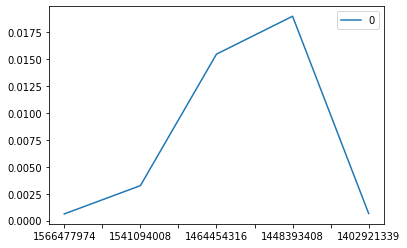

In [41]:
from IPython.display import display, clear_output
city_choice = widgets.Dropdown(options=ga_city_samples, 
                               value=ga_city_samples[0],
                               description='Choose a city:',
                               disabled=False)
display(city_choice) 

submit_button = widgets.Button(description = "Get Results!")
display(submit_button)

def handle_submit(sender):
    # Clear prior results
    clear_output()
    display(city_choice) 
    display(submit_button)

    # Give a time warning
    print("We are analyzing your results. There is a lot of data to comb through, one second!")
    
    # Get city index
    search_city = city_choice.value    
    search_index_but = [i for i, val in enumerate(GA_cities.NAME == search_city) if val][0]
    
    # Bind data in a Dataframe
    sec_city = pd.DataFrame.from_dict(list_1[search_index_but], orient='index')
    
    # Plot the data
    sec_plot = sec_city.plot()
    print(sec_plot)
    
submit_button.on_click(handle_submit)